In [1]:
# Import The proccessed Data

import pandas as pd

file_path = "cleaned_data_amazon_reviews.csv"
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')
df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_review,review_count,tokens,adj_noun_pairs
0,US,669612,R2MTHHQM6RSDQK,B00503E8S2,895635946,Call of Duty: Modern Warfare 3 - Xbox 360,Video Games,4,0,1,N,N,Four Stars,"I enjoyed th game, But it was easy to beat.",2015-08-31,i enjoyed th game but it was easy to beat,1932,"['enjoyed', 'th', 'game', 'easy', 'beat']",[]
1,US,44025365,R1R0CI93K1AEEP,B00503E8S2,895635946,Call of Duty: Modern Warfare 3 - Xbox 360,Video Games,5,0,1,N,Y,Five Stars,Everything was great,2015-08-25,everything was great,1932,"['everything', 'great']",[]
2,US,32104945,R1JVAGNQK31BXC,B00503E8S2,895635946,Call of Duty: Modern Warfare 3 - Xbox 360,Video Games,5,0,1,N,Y,Great game!,Game came perfect and quick. No major complaints.,2015-08-22,game came perfect and quick no major complaints,1932,"['game', 'came', 'perfect', 'quick', 'major', ...","[('major', 'complaints')]"
3,US,2454236,R3J7RKKVU8V73S,B00503E8S2,895635946,Call of Duty: Modern Warfare 3 - Xbox 360,Video Games,5,0,0,N,Y,Five stars,Five stars. This is the best used copy of any ...,2015-08-13,five stars this is the best used copy of any g...,1932,"['five', 'stars', 'best', 'used', 'copy', 'gam...",[]
4,US,21830745,RK4QTWPLSX37U,B00503E8S2,895635946,Call of Duty: Modern Warfare 3 - Xbox 360,Video Games,5,0,1,N,Y,Five Stars,great game,2015-08-10,great game,1932,"['great', 'game']","[('great', 'game')]"


In [ ]:
df.groupby('product_title').size()

product_title
Anker 8200 DPI High Precision Programmable Laser Gaming Mouse for PC, 9 Programmable Buttons, Weight Tuning Cartridges, Omron Micro     2180
Call of Duty: Black Ops II                                                                                                              2528
Call of Duty: Black Ops II - PlayStation 3                                                                                              1995
Call of Duty: Ghosts                                                                                                                    4530
Call of Duty: Modern Warfare 3 - Xbox 360                                                                                               1932
Diablo III - PC/Mac                                                                                                                     3715
DualShock 4 Wireless Controller for PlayStation 4 - Jet Black [Old Model]                                                               2259

In [31]:
# Use only 2 Producs for fast processing
# Chosing one game and one Phyiscal Prduct

included_products = ["Grand Theft Auto V", "PlayStation Headsets"] 
df_small = df[df['product_title'].isin(included_products)].copy()

print(df_small['product_title'].unique())

['Grand Theft Auto V' 'PlayStation Headsets']


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
stop_words = set(stopwords.words('english'))

# Remove punctuation and special characters
# Keep only words and spaces
# Remove stopwords

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df_small['cleaned_tokens'] = df_small['tokens'].apply(preprocess_text)


In [33]:
def get_sentiment_words(tokens):
    text = " ".join(tokens)
    blob = TextBlob(text)
    return [word for word, tag in blob.tags if tag == 'JJ']  # Extract adjectives

df_small['adjectives'] = df_small['cleaned_tokens'].apply(get_sentiment_words)
df_small.head(15)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,verified_purchase,review_headline,review_body,review_date,cleaned_review,review_count,tokens,adj_noun_pairs,cleaned_tokens,adjectives
22437,US,13103144,R3719LA16LDIE4,B0050SYILE,290750095,Grand Theft Auto V,Video Games,1,0,3,...,Y,One Star,Not my favorite.,2015-08-31,not my favorite,3545,['favorite'],[],[favorite],[]
22438,US,37304305,R2XNHDWJEU0AJB,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,0,0,...,Y,Five Stars,Perfect shape. Everything was with it. Arrived...,2015-08-31,perfect shape everything was with it arrived b...,3545,"['perfect', 'shape', 'everything', 'arrived', ...","[('perfect', 'shape')]","[perfect, shape, everything, arrived, expected...","[perfect, expected]"
22439,US,125367,RLOETVF6NG2MR,B0050SYILE,290750095,Grand Theft Auto V,Video Games,4,0,0,...,Y,Four Stars,The disk was scratched but other than that It ...,2015-08-30,the disk was scratched but other than that it ...,3545,"['disk', 'scratched', 'runs', 'nicely']",[],"[disk, scratched, runs, nicely]",[]
22440,US,6916118,R340CROGG49D4S,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,1,2,...,Y,Five Stars,I like it. Not for kids younger than 16-17.,2015-08-30,i like it not for kids younger than,3545,"['like', 'kids', 'younger']",[],"[like, kids, younger]",[]
22441,US,508900,R2LOPE2IBGLNCV,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,0,0,...,N,Good game one of my all time favorites,I bought this item in my local GameStop for a ...,2015-08-28,i bought this item in my local gamestop for a ...,3545,"['bought', 'item', 'local', 'gamestop', 'bit',...","[('local', 'gamestop'), ('best', 'graphics'), ...","[bought, item, local, gamestop, bit, cheap, an...","[bought, local, cheap, luv, bad, didnt]"
22442,US,244419,RZP8CBSXU64JT,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,0,1,...,Y,Five Stars,It kep freezing and the disc 1 won't work but ...,2015-08-27,it kep freezing and the disc wont work but i ...,3545,"['kep', 'freezing', 'disc', 'wont', 'work', 'g...",[],"[kep, freezing, disc, wont, work, got, play, g...","[disc, wont, play, lil, great]"
22443,US,2564812,R16VXQIV1YD8ZQ,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,0,0,...,Y,Five Stars,excellent,2015-08-27,excellent,3545,['excellent'],[],[excellent],[]
22444,US,113741,RNR7YP7YNCB8H,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,0,0,...,Y,Awesome,"Awesome, I am so happy Amazon exists because n...",2015-08-26,awesome i am so happy amazon exists because no...,3545,"['awesome', 'happy', 'amazon', 'exists', 'none...","[('happy', 'amazon')]","[awesome, happy, amazon, exists, none, discs, ...","[awesome, happy]"
22445,US,22175364,RAJSMD0UMZSZW,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,1,1,...,Y,Love this game,"Love this game, a very fun game. You can be ot...",2015-08-25,love this game a very fun game you can be othe...,3545,"['love', 'game', 'fun', 'game', 'people', 'dif...","[('fun', 'game'), ('other', 'people'), ('other...","[love, game, fun, game, people, different, games]","[fun, different]"
22446,US,48866359,R64K6PKPOORG7,B0050SYILE,290750095,Grand Theft Auto V,Video Games,5,0,0,...,Y,Action Packed & Adult Themed,"This game is so much fun, highly recommend!",2015-08-25,this game is so much fun highly recommend,3545,"['game', 'much', 'fun', 'highly', 'recommend']","[('much', 'fun')]","[game, much, fun, highly, recommend]",[much]


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER lexicon (a dictionary of sentiment-related words)
vader_lexicon = set(analyzer.lexicon.keys())

def extract_impressions(tokens):
    # Filter tokens that exist in the VADER lexicon
    return [token for token in tokens if token in vader_lexicon]

# Apply the function to your 'cleaned_tokens' column
df_small['impressions'] = df_small['cleaned_tokens'].apply(extract_impressions)



                                          cleaned_tokens  \
22437                                         [favorite]   
22438  [perfect, shape, everything, arrived, expected...   
22439                    [disk, scratched, runs, nicely]   
22440                              [like, kids, younger]   
22441  [bought, item, local, gamestop, bit, cheap, an...   

                       impressions  
22437                   [favorite]  
22438            [perfect, thanks]  
22439                     [nicely]  
22440                       [like]  
22441  [best, played, bad, amazon]  


In [35]:

df_small[['cleaned_tokens', 'impressions']].head(15)

,cleaned_tokens,impressions
22437,[favorite],[favorite]
22438,"[perfect, shape, everything, arrived, expected...","[perfect, thanks]"
22439,"[disk, scratched, runs, nicely]",[nicely]
22440,"[like, kids, younger]",[like]
22441,"[bought, item, local, gamestop, bit, cheap, an...","[best, played, bad, amazon]"
22442,"[kep, freezing, disc, wont, work, got, play, g...","[freezing, play, great]"
22443,[excellent],[excellent]
22444,"[awesome, happy, amazon, exists, none, discs, ...","[awesome, happy, amazon]"
22445,"[love, game, fun, game, people, different, games]","[love, fun]"
22446,"[game, much, fun, highly, recommend]","[fun, recommend]"


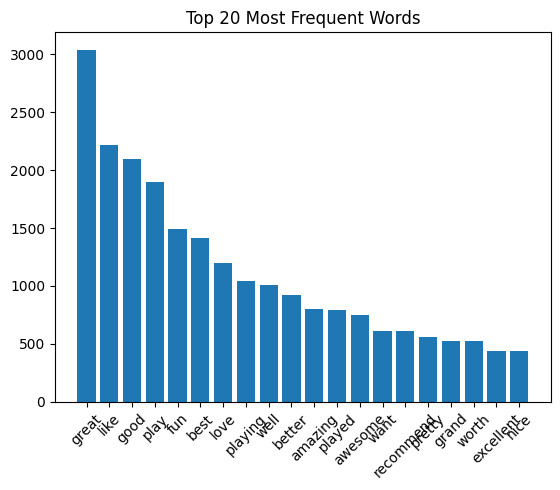

In [37]:

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Flatten all tokens into a single list
all_words = [word for tokens in df_small['impressions'] for word in tokens]
word_freq = Counter(all_words)

# Plot top 20 most frequent words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.show()

In [ ]:
grouped = df_small.groupby('product_title')

# Function to calculate and plot top frequent words and word for a product
def plot_top_words(product_name, impressions_column, top_n=20):
    all_words = [word for tokens in impressions_column for word in tokens]
    word_freq = Counter(all_words)
    wordcloud = WordCloud(width=800, height=400).generate(" ".join(all_words))

    common_words = word_freq.most_common(top_n)
    words, counts = zip(*common_words)
    # Plot the top words
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} Most Frequent Words for {product_name}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()
    # Wordcloud visualization
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Product: Grand Theft Auto V


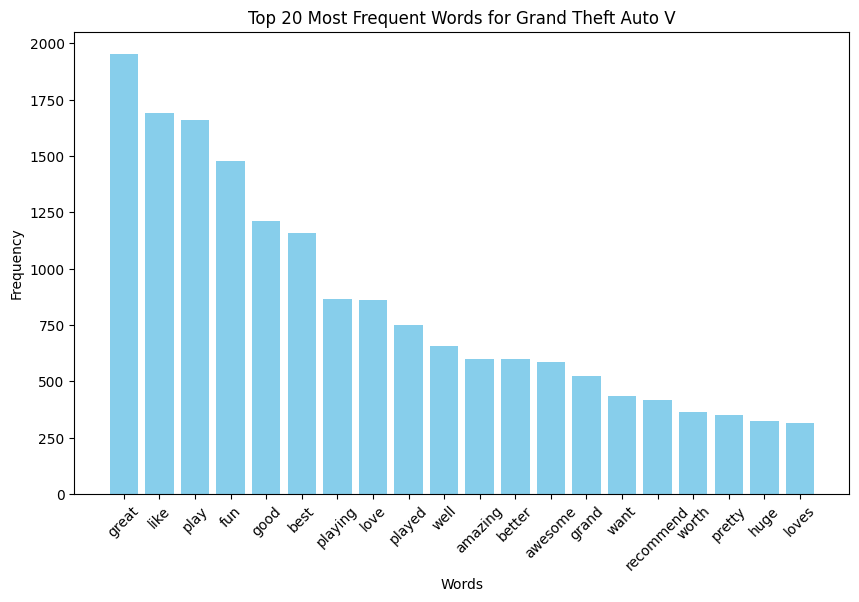

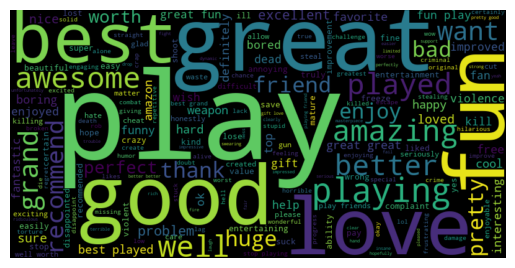

Product: PlayStation Headsets


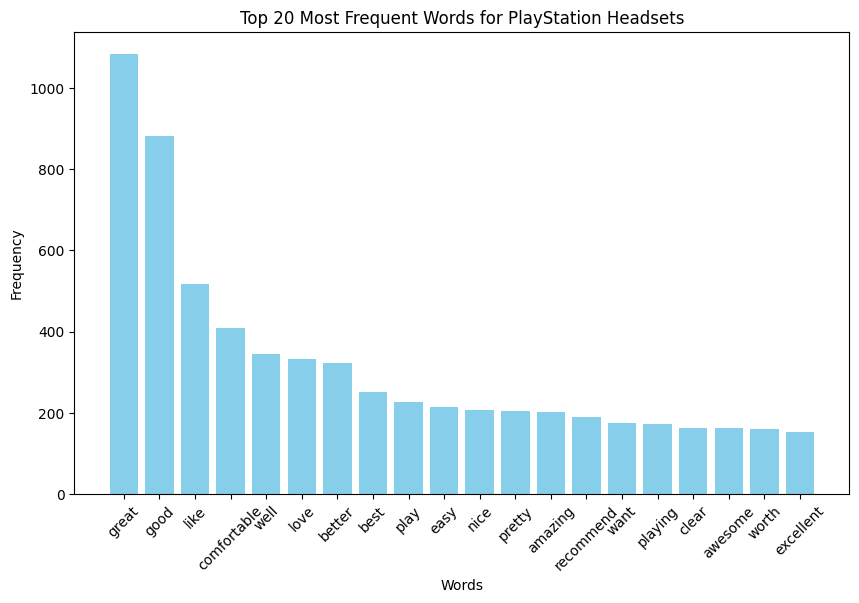

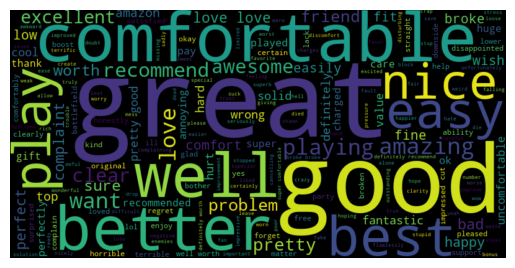

In [42]:
# Loop through each product and plot its top frequent words
for product_name, group in grouped:
    print(f"Product: {product_name}")
    plot_top_words(product_name, group['impressions'])


In [44]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Prepare data for LDA model (create dictionary and corpus)
dictionary = Dictionary(df_small['impressions'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_small['impressions']]

# Train LDA model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.071*"play" + 0.040*"playing" + 0.039*"fun" + 0.029*"like" + 0.026*"friends" + 0.022*"sure" + 0.019*"good" + 0.017*"happy" + 0.017*"better" + 0.017*"enjoy"
Topic 1: 0.234*"great" + 0.057*"fun" + 0.047*"well" + 0.028*"love" + 0.027*"play" + 0.020*"recommend" + 0.019*"worth" + 0.019*"playing" + 0.016*"loved" + 0.015*"gift"
Topic 2: 0.040*"fun" + 0.037*"play" + 0.034*"like" + 0.027*"want" + 0.022*"well" + 0.022*"perfect" + 0.021*"better" + 0.019*"good" + 0.018*"playing" + 0.017*"worth"
Topic 3: 0.125*"best" + 0.052*"played" + 0.049*"awesome" + 0.046*"better" + 0.032*"play" + 0.030*"grand" + 0.029*"good" + 0.028*"amazing" + 0.028*"nice" + 0.027*"definitely"
Topic 4: 0.112*"like" + 0.068*"good" + 0.035*"love" + 0.024*"amazing" + 0.024*"pretty" + 0.024*"play" + 0.021*"well" + 0.020*"great" + 0.016*"fun" + 0.015*"playing"


In [45]:
df_small.to_csv("small_cleaned_data_amazon.csv", index=False)